# Importing Libraries and Downloading Data

In [18]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [19]:
aapl_ticker = yf.Ticker('AAPL')
aapl_df = aapl_ticker.history('AAPL', start='2023-01-01', end='2024-02-01') #Downloading Historic data

In [20]:
aapl_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0
2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0
2023-01-05 00:00:00-05:00,126.091219,126.725989,123.740589,123.998459,80962700,0.0,0.0
2023-01-06 00:00:00-05:00,124.980357,129.225376,123.869506,128.560852,87754700,0.0,0.0
2023-01-09 00:00:00-05:00,129.403925,132.319905,128.828663,129.086533,70790800,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-25 00:00:00-05:00,194.707126,195.754371,192.602669,193.659882,54822100,0.0,0.0
2024-01-26 00:00:00-05:00,193.759620,194.248323,191.435740,191.914474,44594000,0.0,0.0
2024-01-29 00:00:00-05:00,191.505551,191.695054,189.081942,191.226288,47145600,0.0,0.0


In [21]:
aapl_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

# Performing Datetime Operations

In [22]:
date_col=(aapl_df.index) #Accessing dates in date time format

In [23]:
date_col

DatetimeIndex(['2023-01-03 00:00:00-05:00', '2023-01-04 00:00:00-05:00',
               '2023-01-05 00:00:00-05:00', '2023-01-06 00:00:00-05:00',
               '2023-01-09 00:00:00-05:00', '2023-01-10 00:00:00-05:00',
               '2023-01-11 00:00:00-05:00', '2023-01-12 00:00:00-05:00',
               '2023-01-13 00:00:00-05:00', '2023-01-17 00:00:00-05:00',
               ...
               '2024-01-18 00:00:00-05:00', '2024-01-19 00:00:00-05:00',
               '2024-01-22 00:00:00-05:00', '2024-01-23 00:00:00-05:00',
               '2024-01-24 00:00:00-05:00', '2024-01-25 00:00:00-05:00',
               '2024-01-26 00:00:00-05:00', '2024-01-29 00:00:00-05:00',
               '2024-01-30 00:00:00-05:00', '2024-01-31 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=271, freq=None)

In [24]:
day_col_str=date_col.strftime('%A') # %A returns the name of day
day_col_int=date_col.strftime('%w') # %w returns a number (as a character) corresponding to the day, 0=Sunday and so on

In [25]:
#inserting the day columns
aapl_df.insert(loc=0, column='Day name', value=day_col_str)
aapl_df.insert(loc=0, column='Day int', value=day_col_int)

In [26]:
aapl_df

,Day int,Day name,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,,
2023-01-03 00:00:00-05:00,2,Tuesday,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0
2023-01-04 00:00:00-05:00,3,Wednesday,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0
2023-01-05 00:00:00-05:00,4,Thursday,126.091219,126.725989,123.740589,123.998459,80962700,0.0,0.0
2023-01-06 00:00:00-05:00,5,Friday,124.980357,129.225376,123.869506,128.560852,87754700,0.0,0.0
2023-01-09 00:00:00-05:00,1,Monday,129.403925,132.319905,128.828663,129.086533,70790800,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-01-25 00:00:00-05:00,4,Thursday,194.707126,195.754371,192.602669,193.659882,54822100,0.0,0.0
2024-01-26 00:00:00-05:00,5,Friday,193.759620,194.248323,191.435740,191.914474,44594000,0.0,0.0
2024-01-29 00:00:00-05:00,1,Monday,191.505551,191.695054,189.081942,191.226288,47145600,0.0,0.0


In [27]:
#Calculating the day-wise average
day_avg=[0]*7
for i in range(1,6):     #loop running through weekdays (Saturday->6, Sunday->0 excluded as market closed)
    avg=aapl_df[aapl_df["Day int"]==chr(ord('0')+i)]['Close'].mean() #Filtering rows for each weekday using binary filter, then taking mean of closing price
    if (day_avg!=np.nan):
        day_avg[i]=(avg)
    

In [28]:
day_avg #List of Day-wise Closing Price averages

[0,
 173.44049390157065,
 172.40107004983085,
 172.61478330377946,
 172.4960263338956,
 173.51188826127486,
 0]

<BarContainer object of 7 artists>

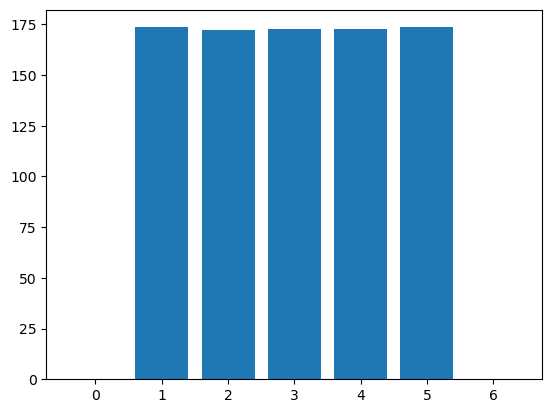

In [29]:
plt.bar(range(7),day_avg) #Bar graph of Avg closing price per Weekday

<BarContainer object of 5 artists>

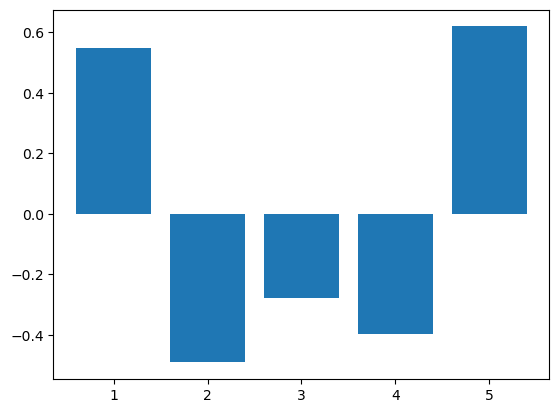

In [30]:
plt.bar(range(1,6),day_avg[1:6]-sum(day_avg)/5) #average price deviation as compared to average of all days (assuming equal distribution of days)

In [31]:
day_avg.index(max(day_avg)) #Weekday with highest closing price on avg

5

High Closing Price on Average on Mondays and Fridays, although difference is marginal. 
Volume traded is significantly higher on Friday.

# Rolling Mean

In [32]:
def roller(df,col,period=7): #Default value of period weekly
    
    new_col=col+'_roll_mean'    #Name of new column based on name of old column
    col_val=df[col]             #Accessing the column
    new_col_val=col_val.copy()  #New column to be added declared
    
    for i in range(1,period):   #Calculating mean using available values with rolling period less than specified to avoid nan
        new_col_val[i]=col_val[0:i + 1].mean()
        
    for i in range(period,len(col_val)):       #Calculating rolling mean
        new_col_val[i]=col_val[i-period+1:i+1].mean()
        
    index=list(df.columns).index(col)+1        #Calculating index to insert the new column, next to old column
    df.insert(loc=index, column=new_col, value=new_col_val) #Inserting new column

In [33]:
roller(aapl_df,'Close')

In [34]:
aapl_df.head(30)

,Day int,Day name,Open,High,Low,Close,Close_roll_mean,Volume,Dividends,Stock Splits
Date,,,,,,,,,,
2023-01-03 00:00:00-05:00,2,Tuesday,129.215470,129.830399,123.155395,124.048042,124.048042,112117500,0.00,0.0
2023-01-04 00:00:00-05:00,3,Wednesday,125.853183,127.608724,124.057975,125.327515,124.687778,89113600,0.00,0.0
2023-01-05 00:00:00-05:00,4,Thursday,126.091219,126.725989,123.740589,123.998459,124.458005,80962700,0.00,0.0
2023-01-06 00:00:00-05:00,5,Friday,124.980357,129.225376,123.869506,128.560852,125.483717,87754700,0.00,0.0
2023-01-09 00:00:00-05:00,1,Monday,129.403925,132.319905,128.828663,129.086533,126.204280,70790800,0.00,0.0
2023-01-10 00:00:00-05:00,2,Tuesday,129.195628,130.187457,127.073115,129.661789,126.780532,63896200,0.00,0.0
2023-01-11 00:00:00-05:00,3,Wednesday,130.177544,132.419072,129.394006,132.399246,127.583205,69458900,0.00,0.0
2023-01-12 00:00:00-05:00,4,Thursday,132.786061,133.162946,130.365996,132.319901,128.764899,71379600,0.00,0.0
2023-01-13 00:00:00-05:00,5,Friday,130.951185,133.817571,130.584214,133.658875,129.955093,57809700,0.00,0.0


In [35]:
aapl_df

,Day int,Day name,Open,High,Low,Close,Close_roll_mean,Volume,Dividends,Stock Splits
Date,,,,,,,,,,
2023-01-03 00:00:00-05:00,2,Tuesday,129.215470,129.830399,123.155395,124.048042,124.048042,112117500,0.0,0.0
2023-01-04 00:00:00-05:00,3,Wednesday,125.853183,127.608724,124.057975,125.327515,124.687778,89113600,0.0,0.0
2023-01-05 00:00:00-05:00,4,Thursday,126.091219,126.725989,123.740589,123.998459,124.458005,80962700,0.0,0.0
2023-01-06 00:00:00-05:00,5,Friday,124.980357,129.225376,123.869506,128.560852,125.483717,87754700,0.0,0.0
2023-01-09 00:00:00-05:00,1,Monday,129.403925,132.319905,128.828663,129.086533,126.204280,70790800,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2024-01-25 00:00:00-05:00,4,Thursday,194.707126,195.754371,192.602669,193.659882,191.012562,54822100,0.0,0.0
2024-01-26 00:00:00-05:00,5,Friday,193.759620,194.248323,191.435740,191.914474,192.400336,44594000,0.0,0.0
2024-01-29 00:00:00-05:00,1,Monday,191.505551,191.695054,189.081942,191.226288,192.842028,47145600,0.0,0.0


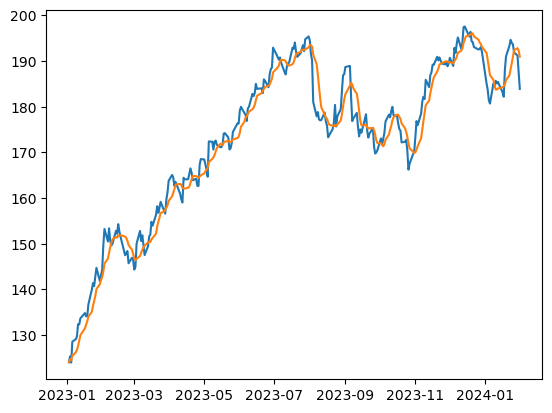

In [37]:
plt.plot(aapl_df['Close'])
plt.plot(aapl_df['Close_roll_mean'])